In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from PIL import Image
import cv2
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model
from pathlib import Path
import os.path
import itertools
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
train = r'C:\Users\LENOVO\Documents\hackathons\vitap\archive\final dataset used for oil spill\dataset-final\dataset\train'
validation = r'C:\Users\LENOVO\Documents\hackathons\vitap\archive\final dataset used for oil spill\dataset-final\dataset\Validation'
test = r'C:\Users\LENOVO\Documents\hackathons\vitap\archive\final dataset used for oil spill\dataset-final\dataset\test'

In [8]:
import sys
print(sys.executable)


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\python.exe


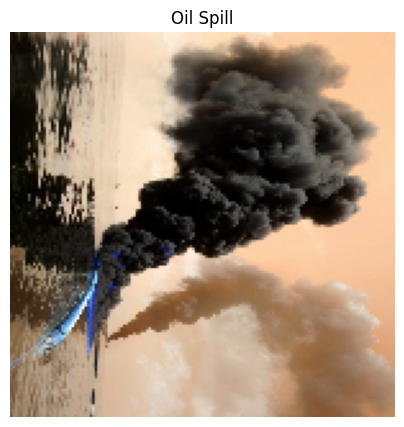

Size of image 1: (150, 150, 3)


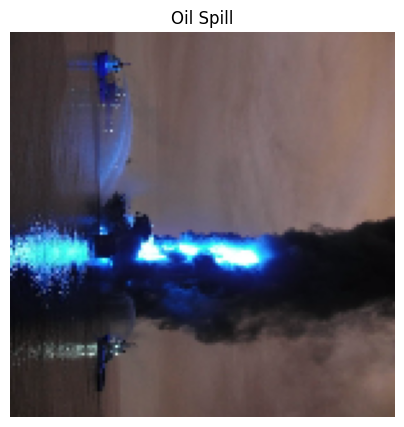

Size of image 2: (150, 150, 3)


In [9]:
labels = ['Non Oil Spill', 'Oil Spill']
img_size = 150
data = []

for label in labels: 
    path = os.path.join(r'C:\Users\LENOVO\Documents\hackathons\vitap\archive\final dataset used for oil spill\dataset-final\dataset\train', label)  
    class_num = labels.index(label)

    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_arr = cv2.imread(img_path)

        if img_arr is not None: 
            img_arr = cv2.resize(img_arr, (img_size, img_size))  
            data.append([img_arr, class_num])  

count=0
for i in range(len(data)):
    if data[i][1] == 1: 
        plt.figure(figsize=(5, 5))
        plt.imshow(data[i][0])  
        plt.title(labels[data[i][1]])  
        plt.axis('off')  
        plt.show()
        
        print(f"Size of image {count + 1}: {data[i][0].shape}")
        
        count += 1  
        
        if count == 2:  
            break

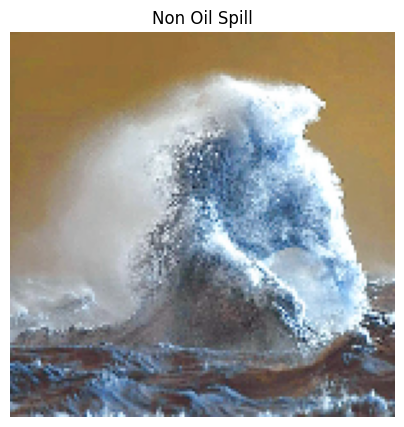

Size of image 1: (150, 150, 3)


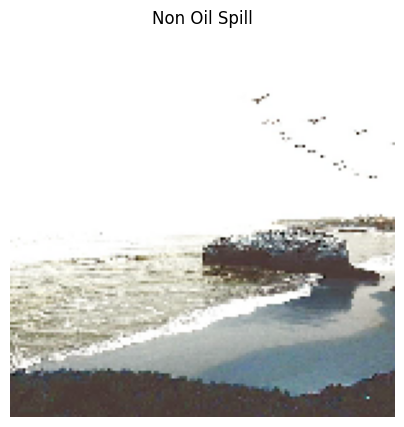

Size of image 2: (150, 150, 3)


In [20]:
data = np.array(data, dtype=object)

for i in range(2):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[i][0])  
    plt.title(labels[data[i][1]])  
    plt.axis('off')  
    plt.show()
    
    print(f"Size of image {i + 1}: {data[i][0].shape}")

In [12]:
def load_data(directory):
    data = []
    for label in labels: 
        path = os.path.join(directory, label)  
        class_num = labels.index(label)

        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            img_arr = cv2.imread(img_path)

            if img_arr is not None: 
                img_arr = cv2.resize(img_arr, (img_size, img_size))  
                data.append([img_arr, class_num])  
    return np.array(data, dtype=object)


Found 2240 images belonging to 2 classes.
Found 560 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 32s 797ms/step - accuracy: 0.5955 - loss: 0.6688 - val_accuracy: 0.5982 - val_loss: 0.6100
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 26s 722ms/step - accuracy: 0.7116 - loss: 0.5604 - val_accuracy: 0.7054 - val_loss: 0.5194
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 32s 915ms/step - accuracy: 0.8121 - loss: 0.4232 - val_accuracy: 0.7571 - val_loss: 0.4913
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8732 - loss: 0.3064 - val_accuracy: 0.9179 - val_loss: 0.1896
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 32s 924ms/step - accuracy: 0.9214 - loss: 0.2077 - val_accuracy: 0.8750 - val_loss: 0.2848
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 32s 926ms/step - accuracy: 0.9406 - loss: 0.1629 - val_accuracy: 0.9571 - val_loss: 0.1122
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9598 - loss: 0.1194 - val_accuracy: 0.923

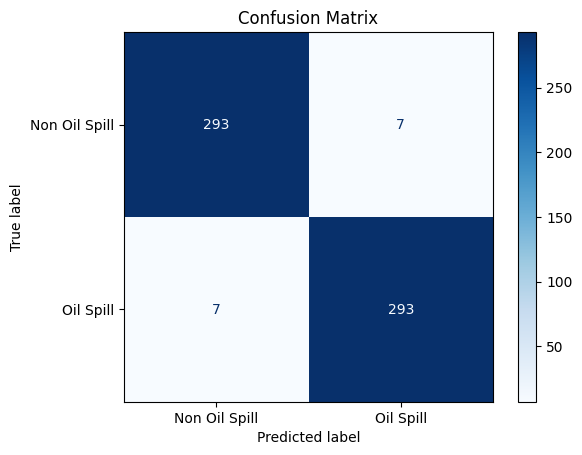

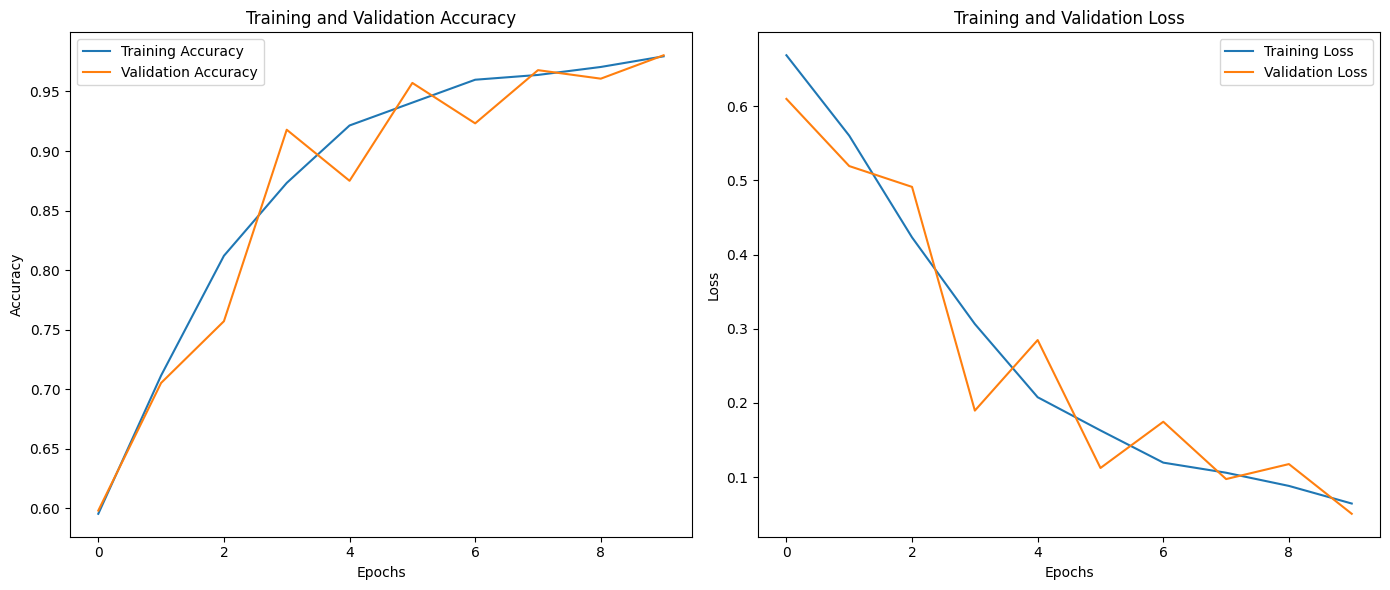

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prepare the data
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training and validation datasets from directories
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(150, 150),
    batch_size=64,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train,  # Same directory as training
    target_size=(150, 150),
    batch_size=64,
    class_mode='binary',
    subset='validation'
)

# Prepare the test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(150, 150),
    batch_size=64,
    class_mode='binary',
    shuffle=False
)

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3), padding="same"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Evaluate on the test data
test_generator.reset()
y_pred_test = (model.predict(test_generator) > 0.5).astype("int32")

# Get true labels
y_test = test_generator.classes

# Classification report
print(classification_report(y_test, y_pred_test))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Plot training/validation accuracy and loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(train_accuracy, label='Training Accuracy')
ax1.plot(val_accuracy, label='Validation Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(train_loss, label='Training Loss')
ax2.plot(val_loss, label='Validation Loss')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

In [19]:
import os
from tensorflow.keras.models import Sequential, load_model

# Create the folder if it doesn't exist
save_dir = r"C:\Users\LENOVO\Documents\hackathons\vitap"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Define the file path
model_path = os.path.join(save_dir, 'm_model.h5')

# Save the model
model.save(model_path)
print(f"Model saved at: {model_path}")

Model saved at: C:\Users\LENOVO\Documents\hackathons\vitap\m_model.h5
